In [43]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100
import plotly.graph_objects as go
from scipy.optimize import fsolve
# import warnings
# warnings.filterwarnings("error")
# import pyvista as pv

In [54]:
def F(Y: np.ndarray, K, f, a, b) -> np.ndarray:
    N = (Y.shape[0] - 1) // 2
    X = Y[:N]
    U = Y[N:2*N]
    C = Y[2*N]

    Yr = np.zeros(2*N+1)
    # fill first equation batch
    E1 = np.zeros(N-1)
    E1rhs = 1/(N-1)*sum(map(lambda i: np.sqrt(1+4/(X[i]**2*X[i+1]**2)*(X[i]*(U[i+1]-C)-X[i+1]*(U[i]-C))**2)*(X[i+1]-X[i]), range(0, N-2+1, 1)))
    for n in range(0, N-2+1, 1):
        E1[n] = np.sqrt(1+4/(X[n]**2*X[n+1]**2)*(X[n]*(U[n+1]-C)-X[n+1]*(U[n]-C))**2)*(X[n+1]-X[n]) - E1rhs
    # fill second equation batch
    E2 = np.zeros(N-2)
    for n in range(1, N-2+1, 1):
        E2[n-1] = ((K(U[n])+K(U[n+1]))/2*(U[n+1]-U[n])/(X[n+1]-X[n])-(K(U[n-1])+K(U[n]))/2*(U[n]-U[n-1])/(X[n]-X[n-1])) / \
            ((X[n+1]+X[n])/2-(X[n]+X[n-1])/2)+f(U[n], X[n])
    # fill boundary values
    E3 = np.array(
        [U[0]-1, U[N-1]-3, X[0]-a, X[N-1]-b]
    )

    # Yr = np.zeros(2*N+1)
    # Yr[:N-1] = E1
    # Yr[N-1:N-1+N-2] = E2
    # Yr[N-1+N-2:] = E3

    return np.concatenate((E1, E2, E3))

In [55]:
T = 1

l = 1

a = 1
b = 2

h = 0.05
tau = 0.005

M = int(T/tau) + 1
N = int((b-a)/h) + 1

X = np.linspace(a, b, N)
U = np.random.rand(N)
# U = np.zeros((M, N))

# Kuxt = lambda u, x, t: u**2
# K = lambda m, n: Kuxt(U[m][n], n*h, m*tau)
K = lambda u: u ** 2
f = lambda u, x: 0#np.sin(x)

# for n in range(N):
#     U[0][n] = 0
    # U[0][n] = -40*((n*h)-0.5)**2+10
    # U[0][n] = 10*np.sin(10*n*h)

C = 1
# for m in range(1, M):
    
Y = np.concatenate((X, U, [C]))
Yr = fsolve(F, Y, args=(K, f, a, b))
X = Yr[:N]
U = Yr[N:2*N]
C = Yr[2*N]

In [57]:
Y, X, C

(array([1.        , 1.05      , 1.1       , 1.15      , 1.2       ,
        1.25      , 1.3       , 1.35      , 1.4       , 1.45      ,
        1.5       , 1.55      , 1.6       , 1.65      , 1.7       ,
        1.75      , 1.8       , 1.85      , 1.9       , 1.95      ,
        2.        , 0.46968908, 0.43299107, 0.72513758, 0.28572506,
        0.77056581, 0.67514252, 0.70058832, 0.62336595, 0.10572235,
        0.57804794, 0.7020289 , 0.33565574, 0.7893104 , 0.31300938,
        0.04573685, 0.09175196, 0.55325268, 0.37617694, 0.23303727,
        0.25832404, 0.32232416, 1.        ]),
 array([1.        , 1.04476243, 1.09274555, 1.14204901, 1.19195476,
        1.24215831, 1.29251794, 1.34296274, 1.39345523, 1.44397477,
        1.49450964, 1.54505304, 1.595601  , 1.64615115, 1.69670213,
        1.74725316, 1.7978038 , 1.84835386, 1.89890324, 1.94945194,
        2.        ]),
 0.6187847491009025)

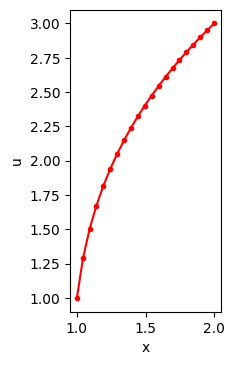

In [56]:
# UX[N:2*N]
# plt.scatter(x=UX[N:2*N], y=UX[:N], s=2)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(X, U, '.r-')
# plt.xlim(0, 1)
# plt.ylim(-0.5, 0.5)
ax.set_aspect('equal', adjustable='box')

plt.xlabel("x")
plt.ylabel("u")

plt.show()